In [1]:
import pandas as pd
import sklearn as sklrn
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OrdinalEncoder, LabelEncoder, OneHotEncoder, PolynomialFeatures
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, f1_score, fbeta_score, balanced_accuracy_score, confusion_matrix, PrecisionRecallDisplay
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV

In [2]:
import warnings
warnings.filterwarnings('ignore')

# Data load

In [3]:
df_train = pd.read_excel('data/Training.xlsb')
df_test = pd.read_excel('data/Test.xlsb')

In [4]:
df_train.head()

,ID,A,B,C,D,E,F,G,H,I,...,P,Q,R,S,T,U,V,W,X,MARKER
0,1,0.198778,0.099389,0.00,799.90,1.777556,0.888778,13,3.49,Woman,...,2 Two,property,No,Works,Yes,Yes,No,Yes,No,0
1,2,0.043000,0.021264,49.97,173.03,0.384511,0.190143,13,3.49,Woman,...,2 Two,otherwise,No,Works,Yes,Yes,Yes,Yes,No,0
2,3,0.067073,0.067073,0.00,329.90,0.599818,0.599818,13,3.49,Woman,...,1 One,property,No,No couple,No,Yes,No,Yes,No,0
3,4,0.052700,0.052700,0.00,235.65,0.471300,0.471300,13,3.49,Woman,...,0 Zero,property,No,No couple,Yes,Yes,Few,Yes,No,0
4,5,0.141880,0.141880,0.00,634.45,1.268900,1.268900,13,3.49,Woman,...,0 Zero,property,No,No couple,Yes,No,No,No,No,0


# Data quality assessment

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89734 entries, 0 to 89733
Data columns (total 26 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      89734 non-null  int64  
 1   A       89734 non-null  float64
 2   B       89734 non-null  float64
 3   C       89734 non-null  float64
 4   D       89734 non-null  float64
 5   E       89734 non-null  float64
 6   F       89734 non-null  float64
 7   G       89734 non-null  int64  
 8   H       89734 non-null  float64
 9   I       89734 non-null  object 
 10  J       89734 non-null  float64
 11  K       89734 non-null  object 
 12  L       89734 non-null  int64  
 13  M       89734 non-null  object 
 14  N       89734 non-null  object 
 15  O       89734 non-null  object 
 16  P       89734 non-null  object 
 17  Q       89734 non-null  object 
 18  R       89734 non-null  object 
 19  S       89734 non-null  object 
 20  T       89734 non-null  object 
 21  U       89734 non-null  object 
 22

In [6]:
df_test.head()

,ID,A,B,C,D,E,F,G,H,I,...,P,Q,R,S,T,U,V,W,X,MARKER
0,1,0.085400,0.085400,29.72,267.28,0.763657,0.763657,13,3.49,Woman,...,1 One,property,No,No couple,Yes,Yes,No,No,No,0
1,2,0.223218,0.111609,0.00,1097.90,1.996182,0.998091,13,3.49,Woman,...,3 Three,property,No,Works,Yes,Yes,No,No,No,1
2,3,0.048400,0.048400,0.00,399.90,0.499875,0.499875,13,1.99,Man,...,0 Zero,property,No,Unemployed,Yes,Yes,No,No,No,0
3,4,0.039560,0.039560,19.59,176.93,0.353860,0.353860,13,3.49,Man,...,1 One,property,No,Unemployed,Yes,Yes,Yes,Yes,No,0
4,5,0.231017,0.173263,0.00,1239.56,2.065933,1.549450,13,3.49,Woman,...,1 One,property,No,Works,Yes,Yes,No,No,No,0


In [7]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38405 entries, 0 to 38404
Data columns (total 26 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      38405 non-null  int64  
 1   A       38405 non-null  float64
 2   B       38405 non-null  float64
 3   C       38405 non-null  float64
 4   D       38405 non-null  float64
 5   E       38405 non-null  float64
 6   F       38405 non-null  float64
 7   G       38405 non-null  int64  
 8   H       38405 non-null  float64
 9   I       38405 non-null  object 
 10  J       38405 non-null  float64
 11  K       38405 non-null  object 
 12  L       38405 non-null  int64  
 13  M       38405 non-null  object 
 14  N       38405 non-null  object 
 15  O       38405 non-null  object 
 16  P       38405 non-null  object 
 17  Q       38405 non-null  object 
 18  R       38405 non-null  object 
 19  S       38405 non-null  object 
 20  T       38405 non-null  object 
 21  U       38405 non-null  object 
 22

In [8]:
df_train.describe(include='object')

,I,K,M,N,O,P,Q,R,S,T,U,V,W,X
count,89734,89734,89734,89734,89734,89734,89734,89734,89734,89734,89734,89734,89734,89734
unique,2,7,5,4,4,5,3,2,5,2,2,3,2,2
top,Woman,Minsk region,NE employee,Secondary education (plus special education),Married,0 Zero,property,No,Works,Yes,Yes,No,No,No
freq,48996,15274,72475,58363,63273,44229,81457,74357,47413,75356,76546,78462,51577,55095


In [9]:
df_train.describe(include='number')

,ID,A,B,C,D,E,F,G,H,J,L,MARKER
count,89734.000000,89734.000000,89734.000000,89734.000000,89734.000000,89734.000000,89734.000000,89734.000000,89734.000000,89734.000000,89734.000000,89734.000000
mean,44867.500000,0.167863,0.113511,85.801266,548.507954,1.011455,0.683640,7.854358,0.510274,41.140778,103.719092,0.003811
std,25904.118865,0.153851,0.105340,105.366771,448.686233,0.910583,0.622047,4.754588,0.928146,11.129976,100.458022,0.061618
min,1.000000,0.000002,0.000001,0.000000,49.980000,0.000016,0.000012,2.000000,0.000000,21.000000,0.000000,0.000000
25%,22434.250000,0.065843,0.042922,20.570000,227.030000,0.405983,0.263775,4.000000,0.000000,32.083333,29.000000,0.000000
50%,44867.500000,0.119133,0.079733,50.020000,408.735000,0.749403,0.499387,5.000000,0.000000,40.000000,69.000000,0.000000
75%,67300.750000,0.220000,0.146990,108.930000,746.710000,1.333367,0.899260,13.000000,0.010000,50.000000,144.000000,0.000000
max,89734.000000,7.067250,0.874025,2682.420000,4999.000000,35.337000,10.352991,24.000000,3.500000,64.916667,540.000000,1.000000


In [10]:
df_train['ID'].is_unique

True

In [11]:
df_train.drop(columns=['ID'], inplace=True)
df_test.drop(columns=['ID'], inplace=True)

In [12]:
np.unique(df_train['MARKER'], return_counts = True)

(array([0, 1], dtype=int64), array([89392,   342], dtype=int64))

In [13]:
np.unique(df_test['MARKER'], return_counts = True)

(array([0, 1], dtype=int64), array([38259,   146], dtype=int64))

In [14]:
df_train.duplicated().sum()

0

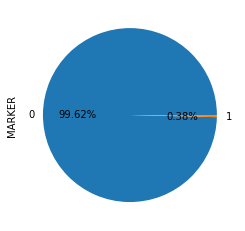

In [15]:
df_train['MARKER'].value_counts().plot.pie(autopct = '%1.2f%%');

### Summary

There is no missed values in the dataset, no filling needed. Classes are highly imbalanced, should take it into account.

# Data exploration

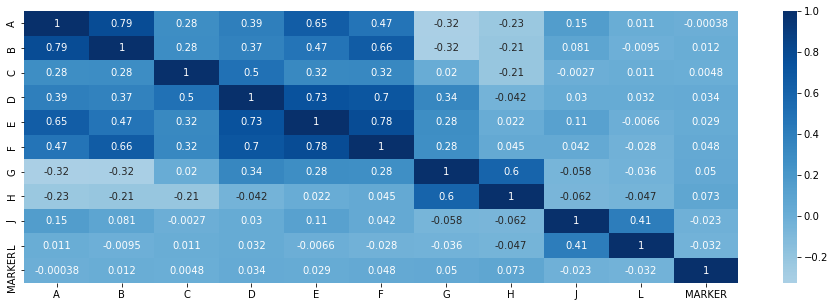

In [16]:
plt.figure(figsize = (16,5))
sns.heatmap(df_train.corr(), center=0, cmap=plt.cm.Blues, annot=True);

In [17]:
print(df_train.shape)
df_test.shape

(89734, 25)


(38405, 25)

In [18]:
print(df_train[df_train['MARKER'] == 1].shape)
df_test[df_test['MARKER'] == 1].shape

(342, 25)


(146, 25)

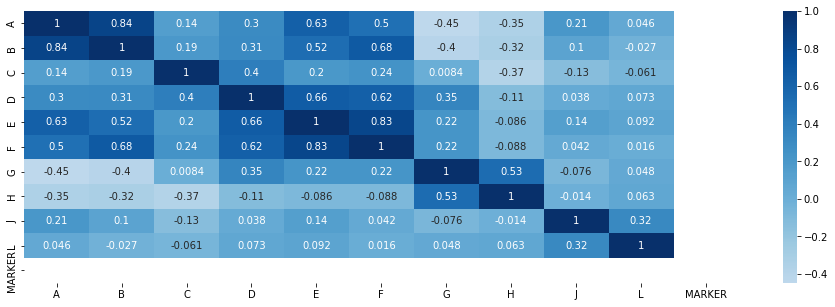

In [19]:
plt.figure(figsize = (16,5))
sns.heatmap(df_train[df_train['MARKER'] == 1].corr(), center=0, cmap=plt.cm.Blues, annot=True);

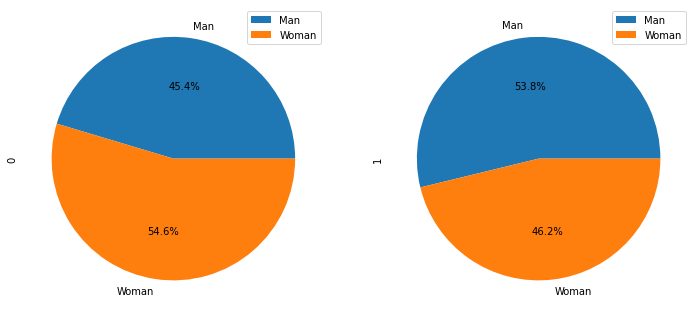

In [20]:
df_train.groupby(['I', 'MARKER']).size().unstack().plot(kind='pie', figsize=(12, 8), subplots=True, autopct='%1.1f%%');

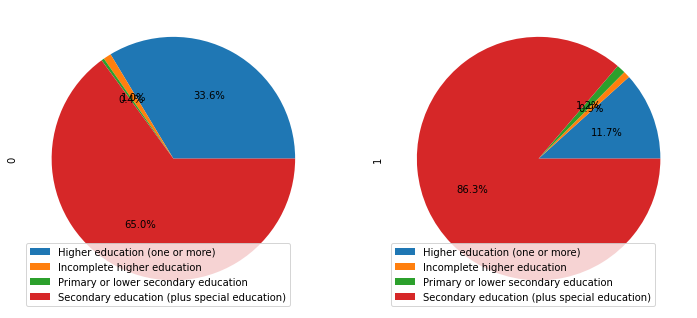

In [21]:
df_train.groupby(['N', 'MARKER']).size().unstack().plot(
    kind='pie', figsize=(12, 8), subplots=True, autopct='%1.1f%%', labeldistance=None
);

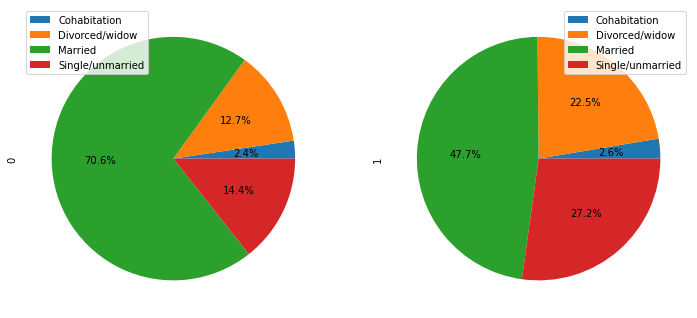

In [22]:
df_train.groupby(['O', 'MARKER']).size().unstack().plot(
    kind='pie', figsize=(12, 8), subplots=True, autopct='%1.1f%%', labeldistance=None
);

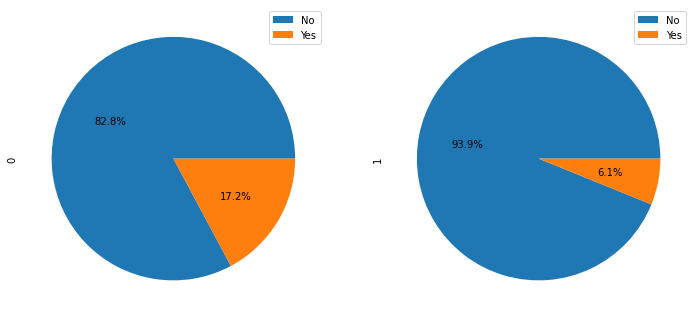

In [23]:
df_train.groupby(['R', 'MARKER']).size().unstack().plot(
    kind='pie', figsize=(12, 8), subplots=True, autopct='%1.1f%%', labeldistance=None
);

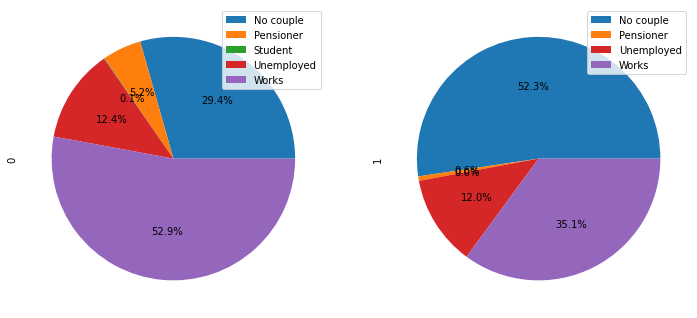

In [24]:
df_train.groupby(['S', 'MARKER']).size().unstack().plot(
    kind='pie', figsize=(12, 8), subplots=True, autopct='%1.1f%%', labeldistance=None
);

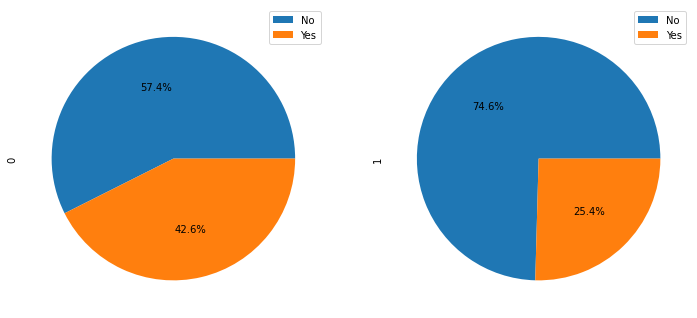

In [25]:
df_train.groupby(['W', 'MARKER']).size().unstack().plot(
    kind='pie', figsize=(12, 8), subplots=True, autopct='%1.1f%%', labeldistance=None
);

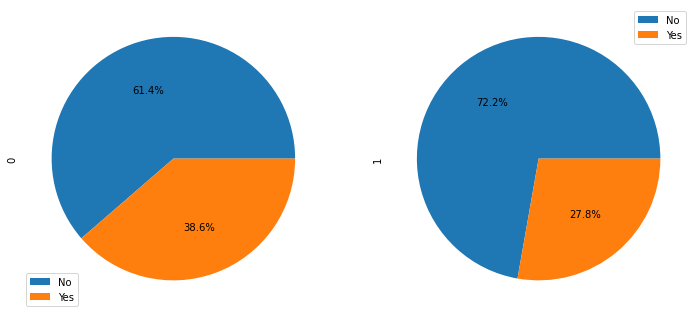

In [26]:
df_train.groupby(['X', 'MARKER']).size().unstack().plot(
    kind='pie', figsize=(12, 8), subplots=True, autopct='%1.1f%%', labeldistance=None
);

### Summary

There is no high correlation of target variable with features. Also I displayed plots with columns' values with drastical difference between '0' and '1' of target variable.

# Data preprocessing

In [27]:
X_train, y_train = df_train.drop(columns=['MARKER']), df_train['MARKER']
X_test, y_test = df_test.drop(columns=['MARKER']), df_test['MARKER']

In [28]:
obj_columns = X_train.select_dtypes(include='object').columns.tolist()
numeric_columns = X_train.select_dtypes(include='number').columns.tolist()

In [29]:
obj_columns

['I', 'K', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X']

In [30]:
numeric_columns

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'J', 'L']

In [31]:
print("Unique values for columns with 'object' type:")
for column in obj_columns:
    print(column)
    print(X_train[column].unique())

Unique values for columns with 'object' type:
I
['Woman' 'Man']
K
['Mogilev region' 'Minsk region' 'Vitebsk region' 'Brest region' 'Minsk'
 'Grodno region' 'Gomel region']
M
['NE employee' 'Pensioner' 'Head/Deputy head (organiz.)'
 'Head/Deputy head (division)' 'Enterpreneur']
N
['Secondary education (plus special education)'
 'Higher education (one or more)' 'Incomplete higher education'
 'Primary or lower secondary education']
O
['Married' 'Divorced/widow' 'Single/unmarried' 'Cohabitation']
P
['2 Two' '1 One' '0 Zero' '3 Three' 'More than 3']
Q
['property' 'otherwise' 'rent/hire']
R
['No' 'Yes']
S
['Works' 'No couple' 'Pensioner' 'Unemployed' 'Student']
T
['Yes' 'No']
U
['Yes' 'No']
V
['No' 'Yes' 'Few']
W
['Yes' 'No']
X
['No' 'Yes']


In [32]:
# ordinal_columns = {'N', 'P'}

# def apply_ordinal_columns_transformation(df):
#     df['N'] = df['N'].map({
#         'Primary or lower secondary education': 0,
#         'Secondary education (plus special education)': 1,
#         'Incomplete higher education': 2,
#         'Secondary education (plus special education)': 3
#     })
#     df['P'] = df['P'].map({
#         '0 Zero': 0,
#         '1 One': 1,
#         '2 Two': 2,
#         '3 Three': 3,
#         'More than 3': 4
#     })
#     pass
    
# apply_ordinal_columns_transformation(X_train)
# apply_ordinal_columns_transformation(X_test)

In [33]:
# Appling OneHotEncoder to categorical columns:

for column in obj_columns:
    ohe = OneHotEncoder(dtype='int32', handle_unknown='ignore')
    column_data = X_train[column]
    transformed_column_data = ohe.fit_transform(column_data.values.reshape(-1, 1)).toarray()
    new_columns_names = [f"{column}_{i}" for i in range(len(column_data.unique()))]
    print(f"column:{column}; new_columns_names:{new_columns_names}")
    X_train = X_train.join(pd.DataFrame(transformed_column_data, columns=new_columns_names))
    
    column_data = X_test[column]
    transformed_column_data = ohe.transform(column_data.values.reshape(-1, 1)).toarray()
    new_columns_names = [f"{column}_{i}" for i in range(len(column_data.unique()))]
    X_test = X_test.join(pd.DataFrame(transformed_column_data, columns=new_columns_names))

X_train.drop(columns=obj_columns, inplace=True)
X_test.drop(columns=obj_columns, inplace=True)

column:I; new_columns_names:['I_0', 'I_1']
column:K; new_columns_names:['K_0', 'K_1', 'K_2', 'K_3', 'K_4', 'K_5', 'K_6']
column:M; new_columns_names:['M_0', 'M_1', 'M_2', 'M_3', 'M_4']
column:N; new_columns_names:['N_0', 'N_1', 'N_2', 'N_3']
column:O; new_columns_names:['O_0', 'O_1', 'O_2', 'O_3']
column:P; new_columns_names:['P_0', 'P_1', 'P_2', 'P_3', 'P_4']
column:Q; new_columns_names:['Q_0', 'Q_1', 'Q_2']
column:R; new_columns_names:['R_0', 'R_1']
column:S; new_columns_names:['S_0', 'S_1', 'S_2', 'S_3', 'S_4']
column:T; new_columns_names:['T_0', 'T_1']
column:U; new_columns_names:['U_0', 'U_1']
column:V; new_columns_names:['V_0', 'V_1', 'V_2']
column:W; new_columns_names:['W_0', 'W_1']
column:X; new_columns_names:['X_0', 'X_1']


In [34]:
X_train.head()

,A,B,C,D,E,F,G,H,J,L,...,T_1,U_0,U_1,V_0,V_1,V_2,W_0,W_1,X_0,X_1
0,0.198778,0.099389,0.00,799.90,1.777556,0.888778,13,3.49,33.750000,132,...,1,0,1,0,1,0,0,1,1,0
1,0.043000,0.021264,49.97,173.03,0.384511,0.190143,13,3.49,33.250000,6,...,1,0,1,0,0,1,0,1,1,0
2,0.067073,0.067073,0.00,329.90,0.599818,0.599818,13,3.49,38.583333,71,...,0,0,1,0,1,0,0,1,1,0
3,0.052700,0.052700,0.00,235.65,0.471300,0.471300,13,3.49,61.250000,48,...,1,0,1,1,0,0,0,1,1,0
4,0.141880,0.141880,0.00,634.45,1.268900,1.268900,13,3.49,48.583333,48,...,1,1,0,0,1,0,1,0,1,0


In [35]:
# Scaling
scaler = StandardScaler()
X_train[numeric_columns] = scaler.fit_transform(X_train[numeric_columns])
X_test[numeric_columns] = scaler.transform(X_test[numeric_columns])

# Model

In [36]:
# grid_params = {
#     'C': [0.001, 0.01, 0.05, 0.1, 0.5, 1],
#     'penalty': ['l1', 'l2', 'elasticnet', 'none'],
#     'solver'  : ['newton-cg', 'lbfgs', 'liblinear', 'saga']
# }
# log_reg = LogisticRegression(random_state=42, max_iter=100, n_jobs=-1, class_weight='balanced')
# grid_search = RandomizedSearchCV(log_reg, grid_params, scoring='roc_auc', n_jobs=-1, cv=5, verbose=2)
# grid_search.fit(X_train, y_train)
# print(f"Best parameters: {grid_search.best_params_}")
# grid_search.best_estimator_

The best found hyperparameters was used in LogisticRegression model:

In [37]:
log_reg_model = LogisticRegression(C=0.01, solver='saga', class_weight='balanced', penalty='l2', random_state=42, n_jobs=-1)
log_reg_model.fit(X_train, y_train)

LogisticRegression(C=0.01, class_weight='balanced', n_jobs=-1, random_state=42,
                   solver='saga')

In [38]:
y_train_pred = log_reg_model.predict(X_train)
y_test_pred = log_reg_model.predict(X_test)

# Quality assessment

In [39]:
def print_metric(fn, y_train, y_train_pred, y_test, y_test_pred):
    print(f"{fn.__name__}:")
    print(f'train: {fn(y_train, y_train_pred)}')
    print(f'test: {fn(y_test, y_test_pred)}')
    print()

In [40]:
metrics = [accuracy_score, balanced_accuracy_score, precision_score, recall_score, f1_score, roc_auc_score]
for metric in metrics:
    print_metric(metric, y_train, y_train_pred, y_test, y_test_pred)

accuracy_score:
train: 0.7987830699623332
test: 0.7973180575445905

balanced_accuracy_score:
train: 0.8159921096593282
test: 0.812982584096069

precision_score:
train: 0.015587398818639247
test: 0.01535532994923858

recall_score:
train: 0.8333333333333334
test: 0.8287671232876712

f1_score:
train: 0.03060238376463009
test: 0.03015200598056317

roc_auc_score:
train: 0.8159921096593282
test: 0.812982584096069



In [41]:
confusion_matrix(y_test, y_test_pred, labels = [1, 0])

array([[  121,    25],
       [ 7759, 30500]], dtype=int64)

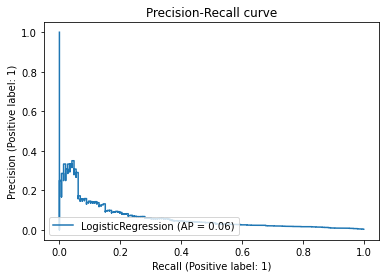

In [42]:
display = PrecisionRecallDisplay.from_estimator(
    log_reg_model, X_test, y_test
)
_ = display.ax_.set_title("Precision-Recall curve")

# Model export

In [ ]:
df_train['MARKER_PRED'] = y_train_pred
df_test['MARKER_PRED'] = y_test_pred
df_train.to_excel('train_pred.xlsx')
df_test.to_excel('test_pred.xlsx')

# Summary

The key metrics that should be taken into account are 'balanced_accuracy_score', 'recall_score' and 'roc_auc_score'. They all have high values. Applying polynomial tranformer with degree=2 gives almost the same metrics' results.
Applying Ordinal encoding on 'N', 'P' columns only gives worse metrics results. Feature selection with BorutaPy or PCA also gives worse metrics results.

Also SVC, RandomForestClassifier, KNeighborsClassifier models was used for predicting target variable. Only SVC showed good compared result, rest are worse.

SVC(kernel="linear", gamma='auto', class_weight='balanced') score results:

balanced_accuracy_score - 0.8116228001863292

recall_score - 0.821917808219178

roc_auc_score - 0.8116228001863292